# CSS 선택자 더 알아보기

실제 웹사이트의 복잡한 HTML 코드를 파싱하려면 css선택자에 대해 좀 더 자세히 알아야 한다.<br>
여러 CSS 선택자를 조합해서 사용할 수 있다.

## OR 연산

,(쉼표)는 OR 연산을 의미한다.<br>

In [ ]:
# 이런 코드가 있다고 가정해보자

<p class="one">paragraph 1</p>
<p class="two">paragraph 2</p>
<p class="three">paragraph 3</p>
<p class="four">paragraph 4</p>
<p class="five">paragraph 5</p>

In [ ]:
# 클래스 이름이 two이거나 four 인 태그를 선택

.two, .four {
  color: red;
}

# AND 연산

In [ ]:
<p class="favorite">paragraph 1</p>
<p class="favorite">paragraph 2</p>
<p class="favorite private">paragraph 3</p>
<p class="private">paragraph 4</p>
<p class="private">paragraph 5</p>

In [ ]:
# and는 클래스를 붙여서 작성
.favorite.private {
  color: red;
}

# 중첩된 요소
HTML 태그 안에 또 다른 HTML 태그가 있을 수 있다 <br>
이런 경우 태그가 중첩되어 있다고 부르는데 <br>
일반적인 웹 페이지의 HTML 태그는 많이 중첩되어 있기 때문에, 중첩에 대한 조건을 추가하는 경우가 많다

In [ ]:
<i>디저트</i>
<p>
  <i>다쿠아즈</i>
  <i>마카롱</i>
  <i>케이크</i>
</p>

# <i>태그는 텍스트를 기울이는 이탤릭 효과
# 모든 <i>태그가 아닌 <p> 태그 안에 중첩된 <i>태그만 가져오고 싶다
# 디저트 말고 다쿠아즈 마카롱, 케이크만 가져오라
# 이런경우 띄어쓰기로 중첩을 표현할 수 있다

In [ ]:
p i { # <p>태그 안에 중첩된 <i> 태그를 의미한다.
  color: red;
}

# 파싱 3

### HTML 코드 받아오기

In [ ]:
import requests

# HTML 코드 받아오기
response = requests.get("https://workey.codeit.kr/music/index")

# 결과 출력
print(response.text)

## BeautifulSoup 타입으로 바꾸기

In [ ]:
import requests
from bs4 import BeautifulSoup

# HTML 코드 받아오기
response = requests.get("https://workey.codeit.kr/music/index")

# BeautifulSoup 타입으로 변환
soup = BeautifulSoup(response.text, 'html.parser')

# 결과 출력
print(soup)

## 태그 구조 파악하기

페이지 코드와 크롭 개발자 도구로 구조를 살펴보기
우리가 원하는 '인기 아티스트'라는 문자열의 위치는? h3

In [ ]:
<h3 class="popular__title">인기 아티스트</h3>

<ul class="popular__order">
     <li class="list">
          <span class="list__index blue">1</span>
          아이유 (IU)
     </li>
     <li class="list">
          <span class="list__index blue">2</span>
          방탄소년단
     </li>
     <li class="list">
          <span class="list__index blue">3</span>
          Red Velvet (레드벨벳)
     </li>
     <li class="list">
          <span class="list__index">4</span>
          IKON
     </li>
     <li class="list">
          <span class="list__index">5</span>
          멜로망스
     </li>
     <li class="list">
          <span class="list__index">6</span>
          다비치
     </li>
     <li class="list">
          <span class="list__index">7</span>
          윤딴딴
     </li>
     <li class="list">
          <span class="list__index">8</span>
          수지 (SUZY)
     </li>
     <li class="list">
          <span class="list__index">9</span>
          김동률
     </li>
     <li class="list">
          <span class="list__index">10</span>
          폴킴
     </li>
</ul>

# popular__order 라는 클래스를 갖는 <ul> 태그가 있고 그 아래에 10개의 <li> 태그가 있다
# <li> 태그는 1개의 <span> 태그와 텍스트를 가지고 잇다
# <span> 태그에는 순위가 들어있다

## 태그 골라내기
10명의 아티스트 이름을 선택하는 방법
popular__order 클래스를 가진 <ul> 태그에 중첩된 모든 <li>태그를 선택한다.
선택자를 .popular__order li

In [ ]:
import requests
from bs4 import BeautifulSoup

# HTML 코드 받아오기
response = requests.get("https://workey.codeit.kr/music/index")

# BeautifulSoup 타입으로 변환
soup = BeautifulSoup(response.text, 'html.parser')

# "popular__order" 클래스를 가진 태그에 중첩된 모든 <li> 태그 선택
soup.select(".popular__order li")

각 '<li> 태그 안에 있는 텍스트만 꺼내오기 위해 text 메소드 활용 <br>
리스트 각 요소에 적용하기 위해 for 반복문 사용

In [ ]:
import requests
from bs4 import BeautifulSoup

# HTML 코드 받아오기
response = requests.get("https://workey.codeit.kr/music/index")

# BeautifulSoup 타입으로 변환
soup = BeautifulSoup(response.text, 'html.parser')

# "popular__order" 클래스를 가진 태그에 중첩된 모든 <li> 태그 선택
li_tags = soup.select(".popular__order li")

# 빈 리스트 생성
popular_artists = []

# 텍스트 추출해서 리스트에 담기
for li in li_tags:
    popular_artists.append(li.text)

# 결과 출력
print(popular_artists)

In [ ]:
import requests
from bs4 import BeautifulSoup

# HTML 코드 받아오기
response = requests.get("https://workey.codeit.kr/music/index")

# BeautifulSoup 타입으로 변환
soup = BeautifulSoup(response.text, 'html.parser')

# "popular__order" 클래스를 가진 태그에 중첩된 모든 <li> 태그 선택
li_tags = soup.select(".popular__order li")

# 빈 리스트 생성
popular_artists = []

# 텍스트 추출해서 리스트에 담기
for li in li_tags:
    popular_artists.append(li.text.strip()) # 앞뒤 공백제거

# 결과 출력
print(popular_artists)

# 연습문제 - 필요한 페이지만 가져오기

문제설명 : 신세계 홈페이지에서 닌텐도를 검색하고있음 <br>
http://www.ssg.com/search.ssg?target=all&query=nintendo&page=2 주소에서<br>
뒤에 page=2 부분을 활용해서 페이지를 저장하는 것임<br>
그런데 페이지는 무한대로 있는 것이 아니기 때문에<br>
페이지를 계속 가져오다가 특정 페이지에서는 중단한다.<br>
신세계 페이지 에서는 csrch_tip클래스의 유무가 차이점이어서 이를 이용하기로 함<br>

어떤 웹사이트들은 크롤링을 악욕하는 봇들을 차단하기 위해 방어를 하는데<br>
차단 당하지 않기 위해서 해결방안을 도입함<br>

"1. 한 페이지를 가져온 뒤 3초간 쉬었다가 다음 페이지를 가져오도록 했습니다. 처음에 import time을 하고, 3초 멈추고 싶은 곳에 time.sleep(3) 이라고 적으면 됩니다. (실행 시간이 오래 걸리기 때문에, 중간에 print를 넣어서 잘 진행되고 있는지 확인하였습니다.)

"2. user-agent 라는 헤더를 추가해 줬습니다. user-agent는 사용자를 대표해서 여러가지 작업을 해 주는 프로그램인데요. 자세한 내용은 링크(https://developer.mozilla.org/ko/docs/Glossary/User_agent)를 통해 알아보실 수 있습니다.

In [ ]:
import time
import requests
from bs4 import BeautifulSoup

# 빈 리스트 생성
pages = []

# 첫 페이지 번호 지정
page_num = 1

# headers 지정
headers = {
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_2_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36',
}

while True:
    # HTML 코드 받아오기, 위에서 지정해준 헤더 설정해주기
    response = requests.get("http://www.ssg.com/search.ssg?target=all&query=nintendo&page=" + str(page_num), headers=headers)

    # BeautifulSoup 타입으로 변환하기
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # ".csrch_tip" 클래스가 없을 때만 HTML 코드를 리스트에 담기
    if len(soup.select('.csrch_tip')) == 0:
        pages.append(soup)
        print(str(page_num) + "번째 페이지 가져오기 완료")
        page_num += 1
        time.sleep(3)
    else:
        break
print(len(pages))

# 연습문제 - 사이트 주소에 파라미터가 여러개 있는 경우

https://workey.codeit.kr/ratings/index?year=2018&month=1&weekIndex=4<br>
이런 주소처럼 연 월 주차 등의 여러개의 선택값이 있는경우 - for문을 사용한다.<br>
매월 4주인 경우도 있고 5주인 경우도 있음을 고려해줘야함 - 4주의 경우 5주을 입력하면 데이터 값이 없음<br>
데이터가 있고 없고의 차이점을 나타내는 HTML 코드를 찾아야함<br>

문제에서 BeautifulSoup 타입 변환 코드가 아닌 response text를 저장하라고 하는데<br>
이 말은 마지막 리스트에 추가할 때 response.text를 하라는 말이다.<br>

In [ ]:
import requests
from bs4 import BeautifulSoup

# 기간 지정
years = list(range(2010, 2019))
months = list(range(1, 13))
weeks = list(range(0, 5))

# 빈 리스트 생성
rating_pages = []

for year in years:
    for month in months:
        for week in weeks:
            # HTML 코드 받아오기
            response = requests.get("https://workey.codeit.kr/ratings/index?year=" + str(year) + "&month=" + str(month) + "&weekIndex=" + str(week))
            # 각 파라미터를 string으로 지정해줘야 02, 032 등의 숫자를 그대로 받아옴
            # 그렇지 않으면 032가 32로 받아짐
            
            # BeautifulSoup 타입으로 변환하기
            soup = BeautifulSoup(response.text, 'html.parser')

            # "row" 클래스가 1개를 넘는 경우만 페이지를 리스트에 추가
            if len(soup.select('.row')) > 1:
                rating_pages.append(response.text)

# 테스트 코드
print(len(rating_pages)) # 가져온 총 페이지 수 
print(rating_pages[0]) # 첫 번째 페이지의 HTML 코드

# 웹 페이지를 데이터프레임으로 만들기 

웹 페이지에서 상품의 정보를 파싱한 뒤, 리스트를 담은 리스트 형태로 저장한다

### DataFrame 설계하기

In [ ]:
# 원하는 형태
[["이름1", "가격1", '이미지주소1'],
["이름2", "가격2", '이미지주소2'],
["이름3", "가격3", '이미지주소3']

### 파싱하기

In [ ]:
import time
import requests
from bs4 import BeautifulSoup

# 빈 리스트 생성
records = []

# 시작 페이지 지정
page_num = 1

# headers 지정
headers = {
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_2_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36',
}

while True:
    # HTML 코드 받아오기
    response = requests.get("http://www.ssg.com/search.ssg?target=all&query=nintendo&page=" + str(page_num), headers=headers)

    # BeautifulSoup 타입으로 변형하기
    soup = BeautifulSoup(response.text, 'html.parser')

    # "prodName" 클래스가 있을 때만 상품 정보 가져오기
    if len(soup.select('.csrch_tip')) == 0:
        product_names = soup.select('.cunit_info > div.cunit_md.notranslate > div > a > em.tx_ko')
        product_prices = soup.select('.cunit_info > div.cunit_price.notranslate > div.opt_price > em')
        product_urls = soup.select('.cunit_prod > div.thmb > a > img')
        page_num += 1
        time.sleep(3)

        # 여기에 각 상품의 정보를 하나의 레코드로 저장하는 코드 추가

    else:
        break
        
print(len(records))

In [ ]:
print(len(records))
print(records)

### 각 상품의 정보를 하나의 레코드로 만들고, 리스트에 순서대로 추가하기

In [ ]:
import time
import requests
from bs4 import BeautifulSoup
import pandas as pd


# 빈 리스트 생성
records = []

# 시작 페이지 지정
page_num = 1

# headers 지정
headers = {
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_2_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36',
}

while True:
    # HTML 코드 받아오기
    response = requests.get("http://www.ssg.com/search.ssg?target=all&query=nintendo&page=" + str(page_num), headers = headers)

    # BeautifulSoup 타입으로 변형하기
    soup = BeautifulSoup(response.text, 'html.parser')

    # "prodName" 클래스가 있을 때만 상품 정보 가져오기
    if len(soup.select('.csrch_tip')) == 0:
        product_names = soup.select('.cunit_info > div.cunit_md.notranslate > div > a > em.tx_ko')
        product_prices = soup.select('.cunit_info > div.cunit_price.notranslate > div.opt_price > em')
        product_urls = soup.select('.cunit_prod > div.thmb > a > img')
        page_num += 1
        time.sleep(3)

        # 여기에 각 상품의 정보를 하나의 레코드로 저장하는 코드 추가
        for i in range(len(product_names)):
            record = []
            record.append(product_names[i].text)
            record.append(product_prices[i].text.strip())
            record.append("https://www.ssg.com" + product_urls[i].get('src'))
            records.append(record)

    else:
        break
        

# DataFrame 만들기
df = pd.DataFrame(data = records, columns = ["이름", '가격', '이미지 주소'])

df.head()

### 선택자 포함관계 궁금할 때
https://www.w3schools.com/cssref/css_selectors.asp <br>
https://www.nextree.co.kr/p8468/ <br>
https://gist.github.com/magicznyleszek/809a69dd05e1d5f12d01

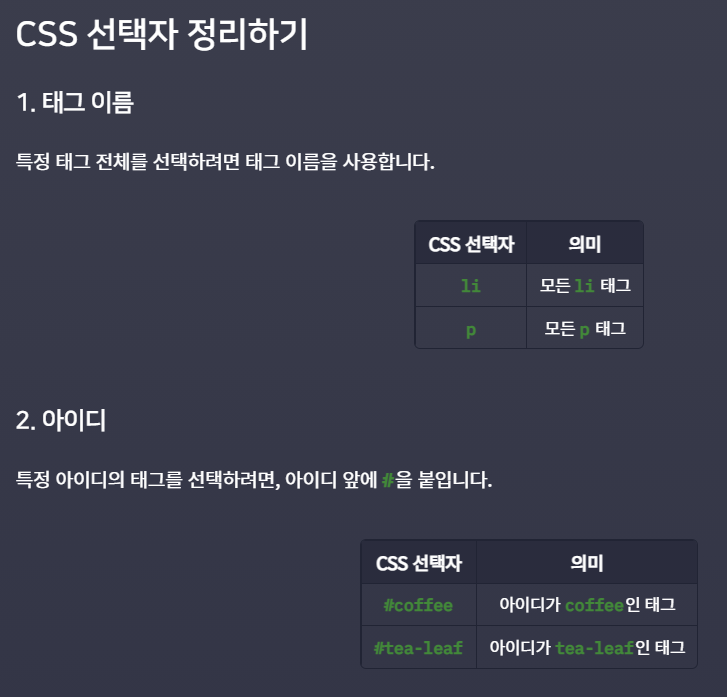

In [23]:
Image("data/선택자_1.png")

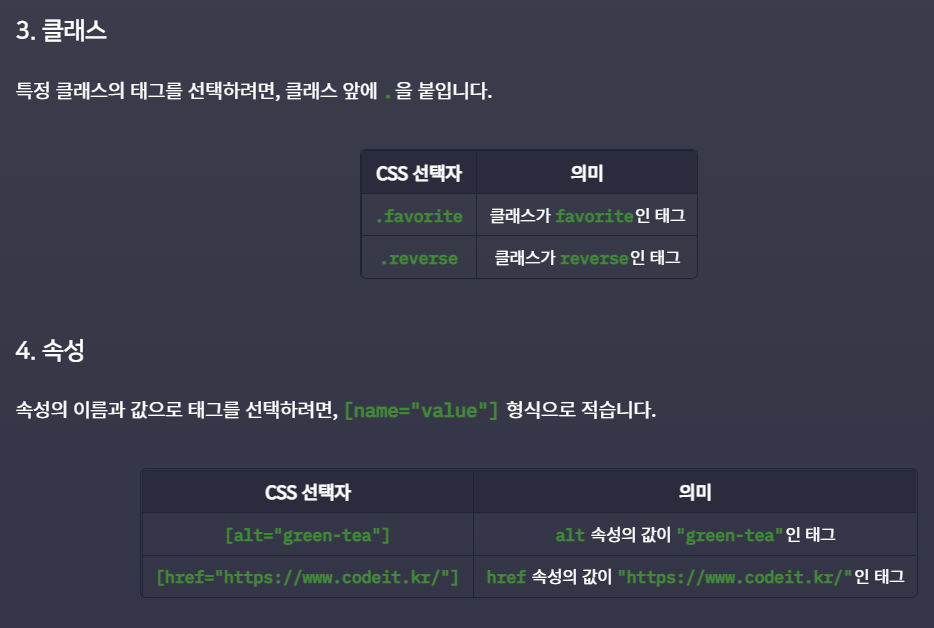

In [24]:
Image("data/선택자_2.png")

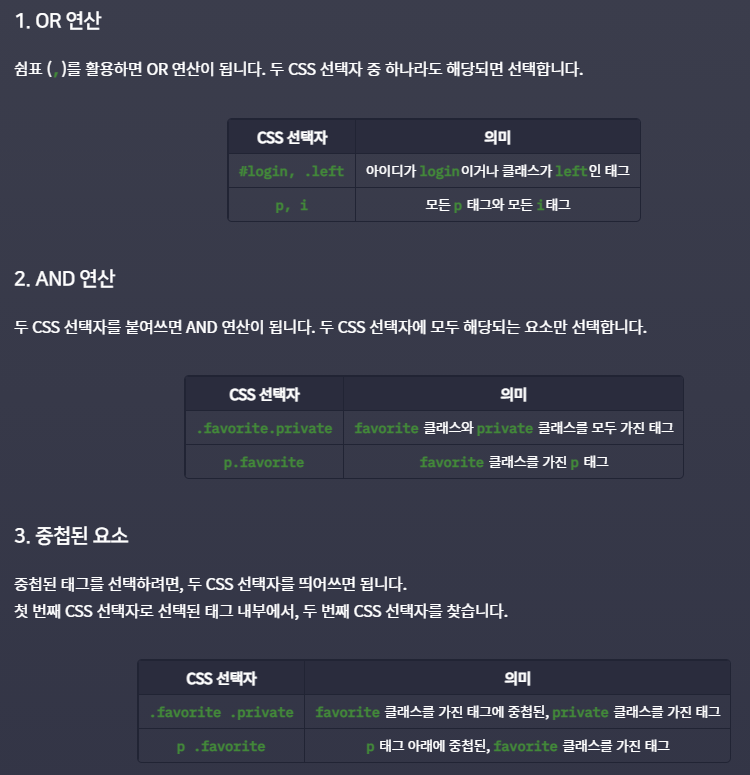

In [25]:
Image("data/선택자_3.png")

# 연습문제 - TV 시청률 크롤링

In [11]:
# 이미지 넣으려고 작성함
!pip install IPython
from IPython.display import Image

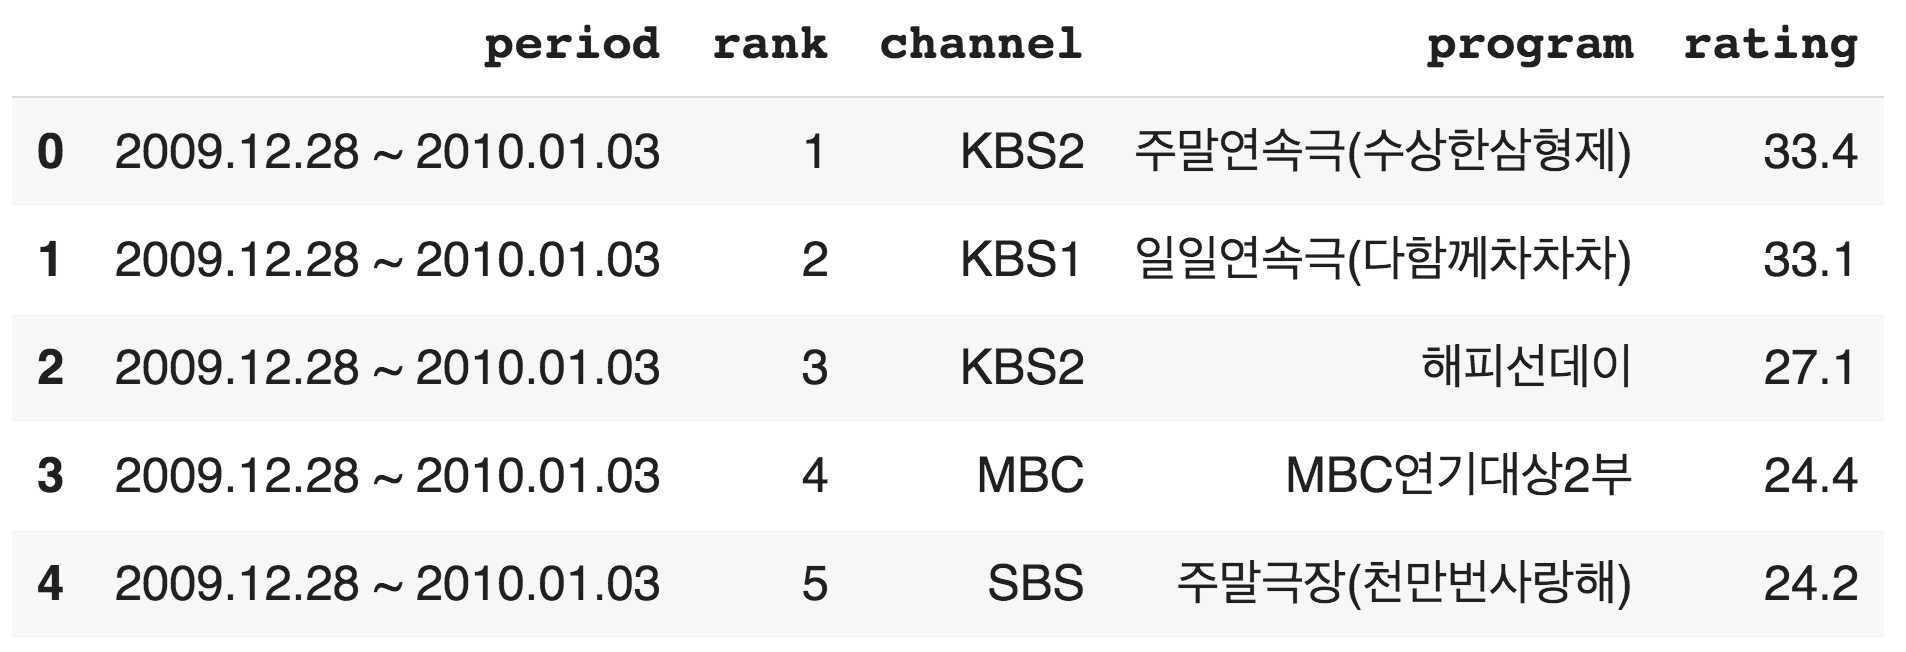

In [14]:
Image("data/예제 이미지.png")

In [29]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# 기간지정
years = list(range(2010, 2019))
months = list(range(1, 13))
weeks = list(range(0,5))

# 페이지를 담는 빈 리스트 생성
rating_pages = []

for year in years:
    for month in months:
        for week in weeks:
            # HTML 코드 받아오기
            response = requests.get("https://workey.codeit.kr/ratings/index?year=" + str(year) + "&month=" + str(month) + "&weekIndex=" + str(week))
            
            # BeautifulSoup 타입으로 변환하기
            soup = BeautifulSoup(response.text, 'html.parser')
            
            # 'row' 클래스가 1개를 넘는 경우만 페이지를 리스트에 추가
            if len(soup.select('.row')) > 1:
                rating_pages.append(soup)
                
# 레코드를 담는 빈 리스트 만들기
records = []

# 각 페잊 파싱해서 정보 얻기
for page in rating_pages:
    date = page.select('option[selected="selected"]')[2].text
    # selected = selected 속성을 가진 option을 선택한다는 의미
    ranks = page.select('.row .rank')[1:]
    channels = page.select('.row .channel')[1:] # 두 클래스의 중첩
    programs = page.select('.row .program')[1:]
    percents = page.select('.row .percent')[1:]

# 정보를 얻고 리스트에 추가를 한다고 생각하자(단계를 세세하게 쪼개야하는 것)

# 페이지에 있는 10개의 레코드를 리스트에 추가
# 이 for문이 위 for문 안에 포함되어야 함
# 페이지를 긁어오고 그 페이지의 것들을 리스트에 넣는것이기 때문
    for i in range(10):
        record = []
        record.append(date)
        record.append(ranks[i].text)
        record.append(channels[i].text)
        record.append(programs[i].text)
        record.append(percents[i].text)
        records.append(record)
    
df = pd.DataFrame(data=records, columns = ['period', 'rank', 'channel', 'program', 'rating'])

In [31]:
df.head(15)

,period,rank,channel,program,rating
0,2009.12.28 ~ 2010.01.03,1,KBS2,주말연속극(수상한삼형제),33.4
1,2009.12.28 ~ 2010.01.03,2,KBS1,일일연속극(다함께차차차),33.1
2,2009.12.28 ~ 2010.01.03,3,KBS2,해피선데이,27.1
3,2009.12.28 ~ 2010.01.03,4,MBC,MBC연기대상2부,24.4
4,2009.12.28 ~ 2010.01.03,5,SBS,주말극장(천만번사랑해),24.2
5,2009.12.28 ~ 2010.01.03,6,MBC,MBC방송연예대상2부,24.0
6,2009.12.28 ~ 2010.01.03,7,MBC,MBC방송연예대상1부,22.4
7,2009.12.28 ~ 2010.01.03,8,SBS,SBS연예대상2부,21.1
8,2009.12.28 ~ 2010.01.03,9,MBC,주말기획드라마(보석비빔밥),20.9
9,2009.12.28 ~ 2010.01.03,10,MBC,일일시트콤(지붕뚫고하이킥),19.9
